In [ ]:
TK - add Google Colab link as well as reference notebook etc

# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning 

In this notebook, we're going to go through an example machine learning project to use the characteristics of bulldozers and their past sales prices to predict the sale price of future bulldozers based on their characteristics.

* **Inputs:** Bulldozer characteristics such as make year, base model, model series, state of sale (e.g. which US state was it sold in), drive system and more.
* **Outputs:** Bulldozer sale price (in USD).

Since we're trying to predict a number, this kind of problem is known as a **regression problem**.

And since we're going to predicting results with a time component (predicting future sales based on past sales), this is also known as a **time series** or **forecasting** problem.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the [Kaggle Bluebook for Bulldozers competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview).

The techniques used in here have been inspired and adapted from [the fast.ai machine learning course](https://course18.fast.ai/ml).

## Overview

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/supervised-projects-6-step-ml-framework-tools-highlight.png?raw=true" width=750/> | 
|:--:| 
| 6 Step Machine Learning Modelling Framework ([read more](https://whimsical.com/9g65jgoRYTxMXxDosndYTB)) |

To work through these topics, we'll use pandas, Matplotlib and NumPy for data analysis, as well as, Scikit-Learn for machine learning and modelling tasks.

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/supervised-projects-6-step-ml-framework-tools-highlight.png?raw=true" width=750/> | 
|:--:| 
| Tools that can be used for each step of the machine learning modelling process. |

We'll work through each step and by the end of the notebook, we'll have a trained machine learning model which predicts the sale price of a bulldozer given different characteristics about it.

### 6 Step Machine Learning Framework

#### 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

#### 2. Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), you can you it's a time series problem. This means there's a time attribute to dataset.

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

> **Note:** You can download the dataset `bluebook-for-bulldozers` dataset directly from Kaggle. Alternatively, you can also [download it directly from the course GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/raw/refs/heads/master/data/bluebook-for-bulldozers.zip).

#### 3. Evaluation

For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

#### 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this is to create a **data dictionary**.

For this dataset, Kaggle provides a data dictionary which contains information about what each attribute of the dataset means. 

For example: 

| Variable Name | Description  | Variable Type |
|------|-----|-----|
| SalesID   | unique identifier of a particular sale of a machine at auction  | Independent  variable |
| MachineID  | identifier for a particular machine; machines may have multiple sales  | Independent  variable |
| ModelID | identifier for a unique machine model (i.e. fiModelDesc) | Independent  variable |
| datasource  | source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs. | Independent  variable |
| auctioneerID  | identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.  | Independent  variable |
| YearMade  | year of manufacturer of the Machine  | Independent  variable |
| MachineHoursCurrentMeter | current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale | Independent  variable |
| UsageBand | value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has fewer hours given its lifespan relative to the average of fiBaseModel. | Independent  variable |
| Saledate   | time of sale | Independent  variable |
| fiModelDesc  | Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor  | Independent  variable |
| State | US State in which sale occurred | Independent  variable |
| Drive_System | machine configuration; typically describes whether 2 or 4 wheel drive  | Independent  variable |
| Enclosure  | machine configuration - does the machine have an enclosed cab or not | Independent  variable |
| Forks  | machine configuration - attachment used for lifting  | Independent  variable |
| Pad_Type | machine configuration - type of treads a crawler machine uses | Independent  variable |
| Ride_Control  | machine configuration - optional feature on loaders to make the ride smoother | Independent  variable |
| Transmission | machine configuration - describes type of transmission; typically automatic or manual | Independent  variable |
| ... | ... | ... |
| SalePrice | cost of sale in USD | Target/dependent variable | 


You can download the full version of this file directly from the [Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (account required) or view it [on Google Sheets](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing).

With all of this being known, let's get started! 

First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

In [1]:
# Timestamp
import datetime

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-02-13 13:29:31.046222


## 1. Importing the data and preparing it for modelling

First thing is first, let's get the libraries we need imported and the data we'll need for the project.

We'll start by importing pandas, NumPy and matplotlib.

In [2]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Print the versions we're using (as long as your versions are equal or higher than these, the code should work)
print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}") 

pandas version: 2.2.3
NumPy version: 2.2.2
matplotlib version: 3.10.0


Now we've got our tools for data analysis ready, we can import the data and start to explore it.

For this project, I've [downloaded the data from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data) and stored it on the [course GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/) under the file path [`../data/bluebook-for-bulldozers`](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/bluebook-for-bulldozers.zip).

We can write some code to check if the files are available locally (on our computer) and if not, we can download them.

> **Note:** If you're running this notebook on Google Colab, the code below will enable you to download the dataset programmatically. Just beware that each time Google Colab shuts down, the data will have to be redownloaded. There's also an [example Google Colab notebook](https://colab.research.google.com/drive/1hf1rTcCAQP1EN8pZ0ZIqjjEy47dwzbiv?usp=sharing) showing how to download the data programmatically.

In [3]:
from pathlib import Path

# Check if 'bluebook-for-bulldozers' exists in the current or parent directory
# Link to data (see the file "bluebook-for-bulldozers"): https://github.com/mrdbourke/zero-to-mastery-ml/tree/master/data
dataset_dir = Path("../data/bluebook-for-bulldozers")
if not (dataset_dir.is_dir()):
    print(f"[INFO] Can't find existing 'bluebook-for-bulldozers' dataset in current directory or parent directory, downloading...")

    # Download and unzip the bluebook for bulldozers dataset
    !wget https://github.com/mrdbourke/zero-to-mastery-ml/raw/refs/heads/master/data/bluebook-for-bulldozers.zip
    !unzip bluebook-for-bulldozers.zip

    # Ensure a data directory exists and move the downloaded dataset there
    !mkdir ../data/
    !mv bluebook-for-bulldozers ../data/
    print(f"[INFO] Current dataset dir: {dataset_dir}")

    # Remove .zip file from notebook directory
    !rm -rf bluebook-for-bulldozers.zip
else:
    # If the target dataset directory exists, we don't need to download it
    print(f"[INFO] 'bluebook-for-bulldozers' dataset exists, feel free to proceed!")
    print(f"[INFO] Current dataset dir: {dataset_dir}")

[INFO] Can't find existing 'bluebook-for-bulldozers' dataset in current directory or parent directory, downloading...


'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
The syntax of the command is incorrect.


[INFO] Current dataset dir: ..\data\bluebook-for-bulldozers


'mv' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


Dataset downloaded!

Let's check what files are available.

In [4]:
import os

print(f"[INFO] Files/folders available in {dataset_dir}:")
os.listdir(dataset_dir)

[INFO] Files/folders available in ../data/bluebook-for-bulldozers:


['random_forest_benchmark_test.csv',
 'Valid.csv',
 'median_benchmark.csv',
 'Valid.zip',
 'TrainAndValid.7z',
 'Test.csv',
 'Train.7z',
 'test_predictions.csv',
 'ValidSolution.csv',
 'train_tmp.csv',
 'Machine_Appendix.csv',
 'Train.csv',
 'Valid.7z',
 'Data Dictionary.xlsx',
 'TrainAndValid.csv',
 'Train.zip',
 'TrainAndValid.zip']

You can explore each of these files individually or read about them on the [Kaggle Competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/data).

For now, the main file we're interested in is `TrainAndValid.csv` (this is also a combination of `Train.csv` and `Valid.csv`), this is a combination of the training and validation datasets.

* The training data (`Train.csv`) contains sale data from 1989 up to the end of 2011.
* The validation data (`Valid.csv`) contains sale data from January 1, 2012 - April 30, 2012.
* The test data (`Test.csv`) contains sale data from May 1, 2012 - November 2012.

We'll use the training data to train our model to predict the sale price of bulldozers, we'll then validate its performance on the validation data to see if our model can be improved in any way. Finally, we'll evaluate our best model on the test dataset.

But more on this later on.

Let's import the `TrainAndValid.csv` file and turn it into a pandas DataFrame.

In [4]:
# Import the training and validation set
df = pd.read_csv(filepath_or_buffer="TrainAndValid.csv")

C:\Users\dilen\AppData\Local\Temp\ipykernel_25000\3082002842.py:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath_or_buffer="TrainAndValid.csv")


Wonderful! We've got our DataFrame ready to explore.

You might see a warning appear in the form:

`DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False. df = pd.read_csv("../data/bluebook-for-bulldozers/TrainAndValid.csv")`

This is just saying that some of our columns have multiple/mixed data types. For example, a column may contain strings but also contain integers. This is okay for now and can be addressed later on if necessary.

How about we get some information about our DataFrame?


In [5]:
# Get info about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

Woah! Over 400,000 entries!

That's a much larger dataset than what we've worked with before.

One thing you might have noticed is that the `saledate` column value is being treated as a Python object (it's okay if you didn't notice, these things take practice).

When the `Dtype` is `object`, it's saying that it's a string.

However, when look at it...



In [6]:
df["saledate"][:10]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

We can see that these `object`'s are in the form of dates.

Since we're working on a **time series** problem (a machine learning problem with a time component), it's probably worth it to turn these strings into Python `datetime` objects.

Before we do, let's try visualize our `saledate` column against our `SalePrice` column.

To do so, we can create a scatter plot.

And to prevent our plot from being too big, how about we visualize the first 1000 values?

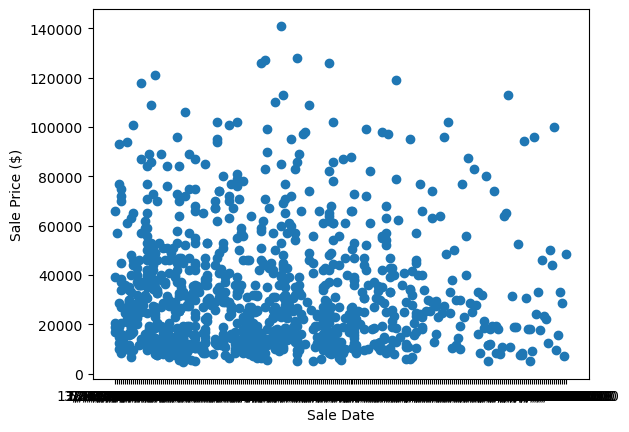

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], # visualize the first 1000 values
           y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)");

Hmm... looks like the x-axis is quite crowded.

Maybe we can fix this by turning the `saledate` column into `datetime` format.

Good news is that is looks like our `SalePrice` column is already in `float64` format so we can view its distribution directly from the DataFrame using a histogram plot.

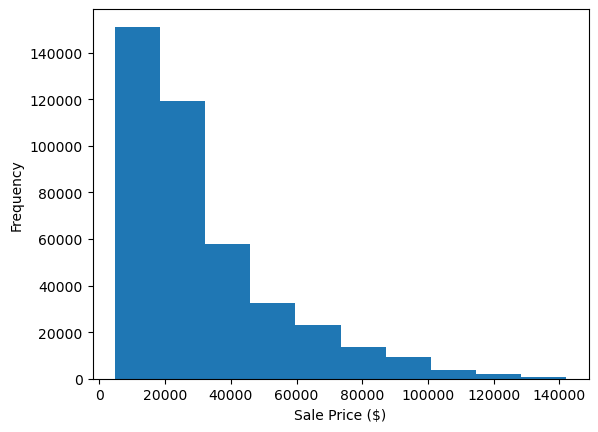

In [8]:
# View SalePrice distribution 
df.SalePrice.plot.hist(xlabel="Sale Price ($)");

### 1.1 Parsing dates

When working with time series data, it's a good idea to make sure any date data is the format of a [datetime object](https://docs.python.org/3/library/datetime.html) (a Python data type which encodes specific information about dates).

We can tell pandas which columns to read in as dates by setting the `parse_dates` parameter in [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

Once we've imported our CSV with the `saledate` column parsed, we can view information about our DataFrame again with `df.info()`. 

In [9]:
df = pd.read_csv(filepath_or_buffer="TrainAndValid.csv",
                 low_memory=False, # set low_memory=False to prevent mixed data types warning 
                 parse_dates=["saledate"]) # can use the parse_dates parameter and specify which column to treat as a date column

# With parse_dates... check dtype of "saledate"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

Nice!

Looks like our `saledate` column is now of type [`datetime64[ns]`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.datetime64), a NumPy-specific datetime format with high precision.

Since pandas works well with NumPy, we can keep it in this format.

How about we view a few samples from our `SaleDate` column again?

In [10]:
df["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

Beautiful! That's looking much better already. 

We'll see how having our dates in this format is really helpful later on.

For now, how about we visualize our `saledate` column against our `SalePrice` column again?

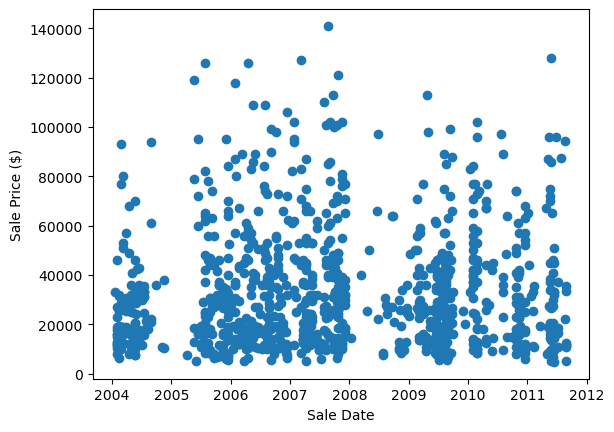

In [11]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], # visualize the first 1000 values
           y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)");

### 1.2 Sorting our DataFrame by saledate

Now we've formatted our `saledate` column to be NumPy `datetime64[ns]` objects, we can use built-in pandas methods such as `sort_values` to sort our DataFrame by date.

And considering this is a time series problem, sorting our DataFrame by date has the added benefit of making sure our data is sequential.

In other words, we want to use examples from the past (example sale prices from previous dates) to try and predict future bulldozer sale prices. 

Let's use the [`pandas.DataFrame.sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method to sort our DataFrame by `saledate` in ascending order.

In [13]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10), df.saledate.tail(10)

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 54653    1989-01-31
 81383    1989-01-31
 204924   1989-01-31
 135376   1989-01-31
 113390   1989-01-31
 Name: saledate, dtype: datetime64[ns],
 409202   2012-04-28
 408976   2012-04-28
 411695   2012-04-28
 411319   2012-04-28
 408889   2012-04-28
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, dtype: datetime64[ns])

Nice!

Looks like our older samples are now coming first and the newer samples are towards the end of the DataFrame.

### 1.3 Adding extra features to our DataFrame

One way to potentially increase the predictive power of our data is to enhance it with more features.

This practice is known as [**feature engineering**](https://en.wikipedia.org/wiki/Feature_engineering), taking existing features and using them to create more/different features. 

There is no set in stone way to do feature engineering and often it takes quite a bit of practice/exploration/experimentation to figure out what might work and what won't.

For now, we'll use our `saledate` column to add extra features such as:

* Year of sale
* Month of sale
* Day of sale
* Day of week sale (e.g. Monday = 1, Tuesday = 2)
* Day of year sale (e.g. January 1st = 1, January 2nd = 2)

Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [13]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

Because we imported the data using `read_csv()` and we asked pandas to parse the dates using `parase_dates=["saledate"]`, we can now access the [different datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) of the `saledate` column.

Let's use these attributes to add a series of different feature columns to our dataset. 

After we've added these extra columns, we can remove the original `saledate` column as its information will be dispersed across these new columns.

In [14]:
# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate column
df_tmp.drop("saledate", axis=1, inplace=True)

We could add more of these style of columns, such as, whether it was the start or end of a quarter (the sale being at the end of a quarter may bye influenced by things such as quarterly budgets) but these will do for now.

> **Challenge:** See what other [datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) you can add to `df_tmp` using a similar technique to what we've used above. Hint: check the bottom of the pandas.DatetimeIndex docs.

How about we view some of our newly created columns?

In [16]:
# View newly created columns
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofweek", "saleDayofyear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,66000.0,2006,11,16,3,320
1,57000.0,2004,3,26,4,86
2,10000.0,2004,2,26,3,57
3,38500.0,2011,5,19,3,139
4,11000.0,2009,7,23,3,204


Cool!

Now we've broken our `saledate` column into columns/features, we can perform further exploratory analysis such as visualizing the `SalePrice` against the `saleMonth`.

How about we view the first 10,000 samples (we could also randomly select 10,000 samples too) to see if reveals anything about which month has the highest sales?

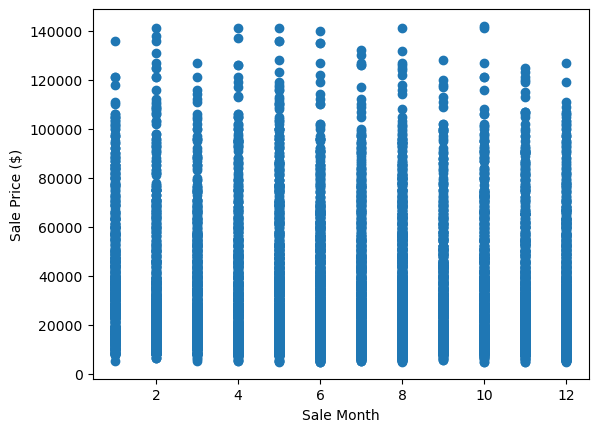

In [17]:
# View 10,000 samples SalePrice against saleMonth
fig, ax = plt.subplots()
ax.scatter(x=df_tmp["saleMonth"][:10000], # visualize the first 10000 values
           y=df_tmp["SalePrice"][:10000])
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)");

Hmm... doesn't look like there's too much conclusive evidence here about which month has the highest sales value.

How about we plot the median sale price of each month?

We can do so by grouping on the `saleMonth` column with [`pandas.DataFrame.groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and then getting the median of the `SalePrice` column.

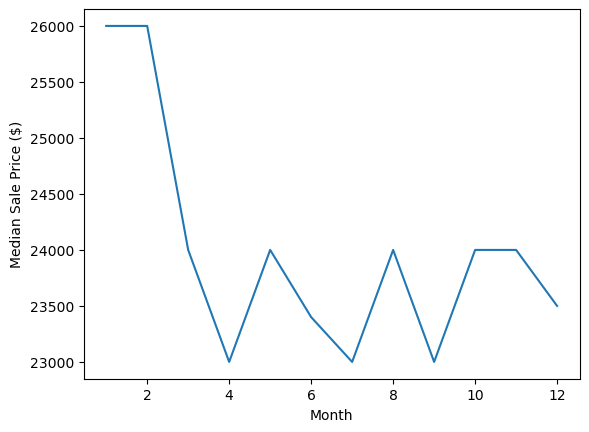

In [18]:
# Group DataFrame by saleMonth and then find the median SalePrice
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)");

Ohhh it looks like the median sale prices of January and February (months 1 and 2) are quite a bit higher than the other months of the year.

Could this be because of New Year budget spending?

Perhaps... but this would take a bit more investigation.

In the meantime, there are many other values we could look further into.

### TK - 1.4 Inspect values of other columns

When first exploring a new problem, it's often a good idea to become as familiar with the data as you can.

Of course, with a dataset that has over 400,000 samples, it's unlikely you'll ever get through every sample.

But that's where the power of data analysis and machine learning can help.

We can use pandas to aggregate thousands of samples into smaller more managable pieces.

And as we'll see later on, we can use machine learning models to model the data and then later inspect which features the model thought were most important.

How about we see which states sell the most bulldozers?

In [19]:
# Check the different values of different columns
df_tmp.state.value_counts()[:10]

state
Florida        67320
Texas          53110
California     29761
Washington     16222
Georgia        14633
Maryland       13322
Mississippi    13240
Ohio           12369
Illinois       11540
Colorado       11529
Name: count, dtype: int64

Woah! Looks like Flordia sells a fair few bulldozers.

How about we go even further and group our samples by `state` and then find the median `SalePrice` per state?

We also compare this to the median `SalePrice` for all samples.

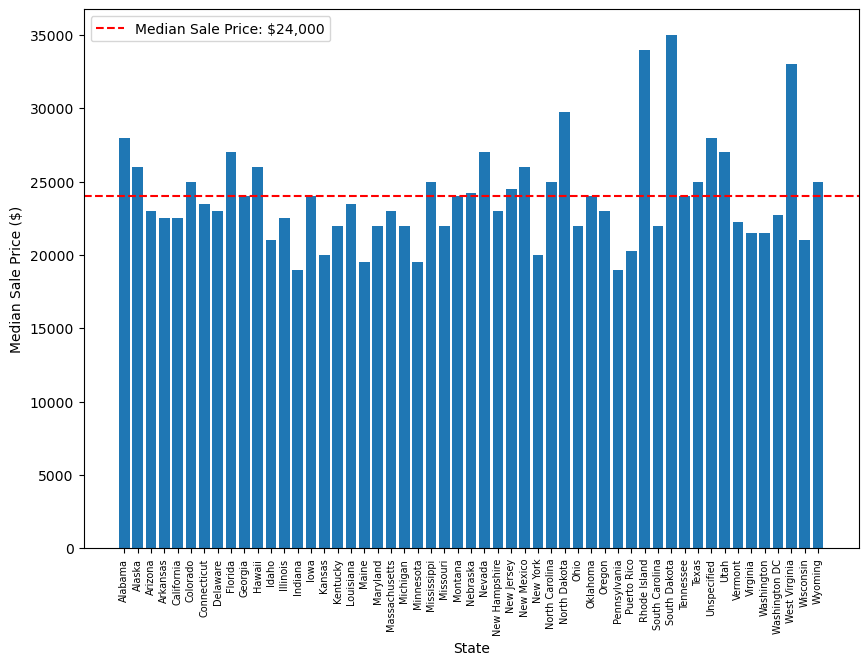

In [20]:
# Group DataFrame by saleMonth and then find the median SalePrice per state as well as across the whole dataset
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median() # this will return a pandas Series rather than a DataFrame
median_sale_price = df_tmp["SalePrice"].median()

# Create a plot comparing median sale price per state to median sale price overall
plt.figure(figsize=(10, 7))
plt.bar(x=median_prices_by_state.index, # Because we're working with a Series, we can use the index (state names) as the x values
        height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7);
plt.axhline(y=median_sale_price, 
            color="red", 
            linestyle="--", 
            label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend();

Now that's a nice looking figure!

Interestingly Florida has the most sales and the median sale price is above the overall median of all other states.

And if you had a bulldozer and were chasing the highest sale price, the data would reveal that perhaps selling in South Dakota would be your best bet.

Perhaps bulldozers are in higher demand in South Dakota because of a building or mining boom?

Answering this would require a bit more research.

But what we're doing here is slowly building up a mental model of our data. 

So that if we saw an example in the future, we could compare its values to the ones we've already seen.

## 2. Model driven exploration

We've performed a small Exploratory Data Analysis (EDA) as well as enriched it with some `datetime` attributes, now let's try to model it.

Why model so early?

Well, we know the evaluation metric (root mean squared log error or RMSLE) we're heading towards. 

We could spend more time doing EDA, finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA whilst simultaneously working towards the best evaluation metric we can get. 

Remember, one of the biggest goals of starting any new machine learning project is reducing the time between experiments.

Following the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/machine_learning_map.html) and taking into account the fact we've got over 100,000 examples, we find a [`sklearn.linear_model.SGDRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) or a [`sklearn.ensemble.RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor) model might be a good candidate.

Since we're worked with the Random Forest algorithm before (on the [heart disease classification problem](https://dev.mrdbourke.com/zero-to-mastery-ml/end-to-end-heart-disease-classification/)), let's try it out on our regression problem.

> **Note:** We're trying just one model here for now. But you can try many other kinds of models from the Scikit-Learn library, they mostly work with a similar API. There are even libraries such as [`LazyPredict`](https://github.com/shankarpandala/lazypredict) which will try many models simultaneously and return a table with the results.

In [21]:
# This won't work since we've got missing numbers and categories
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)
model.fit(X=df_tmp.drop("SalePrice", axis=1), # use all columns except SalePrice as X input
          y=df_tmp.SalePrice) # use SalePrice column as y input

ValueError: could not convert string to float: 'Low'

Oh no!

When we try to fit our model to the data, we get a value error similar to:

> `ValueError: could not convert string to float: 'Low'`

The problem here is that some of the features of our data are in string format and machine learning models love numbers.

Not to mention some of our samples have missing values.

And typically, machine learning models require all data to be in numerical format as well as all missing values to be filled.

Let's start to fix this by inspecting the different datatypes in our DataFrame.

We can do so using the [`pandas.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method, this will give us the different datatypes as well as how many non-null (a null value is generally a missing value) in our `df_tmp` DataFrame.

> **Note:** There are some ML models such as [`sklearn.ensemble.HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html), [CatBoost](https://catboost.ai/) and [XGBoost](https://xgboost.ai/) which can handle missing values, however, I'll leave exploring each of these as extra-curriculum/extensions.

In [21]:
# Check for missing values and different datatypes 
df_tmp.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

Ok, it seems as though we've got a fair few different datatypes. 

There are `int64` types such as `MachineID`.

There are `float64` types such as `SalePrice`.

And there are `object` (the `object` dtype can hold any Python object, including strings) types such as `UseageBand`.

> **Resource:** You can see a list of all the [pandas dtypes in the pandas user guide](https://pandas.pydata.org/docs/user_guide/basics.html#dtypes).

How about we find out how many missing values are in each column?

We can do so using [`pandas.DataFrame.isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) (`isna` stands for 'is null or NaN') which will return a boolean `True`/`False` if a value is missing (`True` if missing, `False` if not). 

Let's start by checking the missing values in the head of our DataFrame.

In [22]:
# Find missing values in the head of our DataFrame 
df_tmp.head().isna()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False


Alright it seems as though we've got some missing values in the `MachineHoursCurrentMeter` as well as the `UsageBand` and a few other columns.

But so far we've only viewed the first few rows.

It'll be very time consuming to go through each row one by one so how about we get the total missing values per column?

We can do so by calling `.isna()` on the whole DataFrame and then chaining it together with `.sum()`.

Doing so will give us the total `True`/`False` values in a given column (when summing, `True` = 1, `False` = 0).

In [23]:
# Check for total missing values per column
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

Woah! It looks like our DataFrame has quite a few missing values.

Not to worry, we can work on fixing this later on.

How about we start by tring to turn all of our data in numbers? 

### TK (change heading?) - Convert strings to categories - TK - possible option: Inspecting the datatypes in our DataFrame 

UPTOHERE - getting all values into numbers (e.g. objects -> categories)

One way to help turn all of our data into numbers is to convert the columns with the `object` datatype into a `category` datatype using [`pandas.CategoricalDtype`](https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html).

> **Note:** There are many different ways to convert values into numbers. And often the best way will be specific to the value you're trying to convert. The method we're going to use, converting all objects (that are mostly strings) to categories is one of the faster methods as it makes a quick assumption that each unique value is its own number. 

We can check the datatype of an individual column using the `.dtype` attribute and we can get its full name using `.dtype.name`.

In [24]:
# Get the dtype of a given column
df_tmp["UsageBand"].dtype, df_tmp["UsageBand"].dtype.name

(dtype('O'), 'object')

Beautiful!

Now we've got a way to check a column's datatype individually.

There's also another group of methods to check a column's datatype directly.

For example, using [`pd.api.types.is_object_dtype(arr_or_dtype)`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_object_dtype.html) we can get a boolean response as to whether the input is an object or not.

> **Note:** There are many more of these checks you can perform for other datatypes such as strings under a similar name space `pd.api.types.is_XYZ_dtype`. See the [pandas documentation](https://pandas.pydata.org/docs/reference/arrays.html) for more.

Let's see how it works on our `df_tmp["UsageBand"]` column.

In [25]:
# Check whether a column is an object
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

We can also check whether a column is a string with [`pd.api.types.is_string_dtype(arr_or_dtype)`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_string_dtype.html). 

In [26]:
# Check whether a column is a string
pd.api.types.is_string_dtype(df_tmp["state"])

True

Nice!

We can even loop through the items (columns and their labels) in our DataFrame using [`pandas.DataFrame.items()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.items.html) (in Python dictionary terms, calling `.items()` on a DataFrame will treat the column names as the keys and the column values as the values) and print out samples of columns which have the `string` datatype.

As an extra check, passing the sample to [`pd.api.types.infer_dtype()`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.infer_dtype.html) will return the datatype of the sample.

This will be a good way to keep exploring our data.

In [27]:
# Quick exampke of calling .items() on a dictionary
random_dict = {"key1": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
    print(f"This is a key: {key}")
    print(f"This is a value: {value}")

This is a key: key1
This is a value: hello
This is a key: key2
This is a value: world!


In [28]:
# Print column names and example content of columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

Column name: fiModelDesc | Column dtype: object | Example value: ['426'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['420'] | Example value dtype: string
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Skid Steer Loader - 1251.0 to 1351.0 Lb Operating Capacity'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Texas'] | Example value dtype: string
Column name: ProductGroup | Column dtype: object | Example value: ['TTT'] | Example value dtype: string
Column name: ProductGroupDesc | Column dtype: object | Example value: ['Skid Steer Loaders'] | Example value dtype: string


Hmm... it seems that there are many more columns in the `df_tmp` with the `object` type that didn't display when checking for the string datatype (we know there are many `object` datatype columns in our DataFrame from using `df_tmp.info()`).

How about we try the same as above, except this time instead of `pd.api.types.is_string_dtype`, we use `pd.api.types.is_object_dtype`?

Let's try it.

In [29]:
# Start a count of how many object type columns there are
number_of_object_type_columns = 0

for label, content in df_tmp.items():
    # Check to see if column is of object type (this will include the string columns)
    if pd.api.types.is_object_dtype(content): 
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

        number_of_object_type_columns += 1

print(f"\n[INFO] Total number of object type columns: {number_of_object_type_columns}")

Column name: UsageBand | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDesc | Column dtype: object | Example value: ['303CR'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['235'] | Example value dtype: string
Column name: fiSecondaryDesc | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelSeries | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDescriptor | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: ProductSize | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Backhoe Loader - 15.0 to 16.0 Ft Standard Digging Depth'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Kentucky'] | Example value dtype: string
Column name: Produ

Wonderful, looks like we've got sample outputs from all of the columns with the `object` datatype.

It also looks like that many of random samples are missing values.

### TK - Converting strings to categories 

In pandas, one way to convert object/string values to numerical values is to convert them to categories or more specifically, the `pd.CategoricalDtype` datatype.

This datatype keeps the underlying data the same (e.g. doesn't change the string) but enables easy conversion to a numeric code using [`.cat.codes`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html).

For example, the column `state` might have the values `'Alabama', 'Alaska', 'Arizona'...` and these could be mapped to numeric values `1, 2, 3...` respectively.

To see this in action, let's first convert the object datatype columns to `"category"` datatype.

We can do so by looping through the `.items()` of our DataFrame and reassigning each object datatype column using [`pandas.Series.astype(dtype="category")`](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html).

In [30]:
# This will turn all of the object columns into category values
for label, content in df_tmp.items(): 
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = df_tmp[label].astype("category")

Wonderful!

Now let's check if it worked by calling `.info()` on our DataFrame.

In [31]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

It looks like it worked!

All of the object datatype columns now have the category datatype.

We can inspect this on a single column using `pandas.Series.dtype`.

In [60]:
# Check the datatype of a single column
df_tmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

Excellent, notice how the column is now of type `pd.CategoricalDtype`.

We can also access these categories using [`pandas.Series.cat.categories`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.categories.html).

In [61]:
# Get the category names of a given column
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

Finally, we can get the category codes (the numeric values representing the category) using [`pandas.Series.cat.codes`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html).

In [42]:
# Inspect the category codes
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

This gives us a numeric representation of our object/string datatype columns.

In [64]:
# Get example string using category number
target_state_cat_number = 43
target_state_cat_value = df_tmp.state.cat.categories[target_state_cat_number] 
print(f"[INFO] Target state category number {target_state_cat_number} maps to: {target_state_cat_value}")

[INFO] Target state category number 43 maps to: Texas


UPTOHERE - filling missing values, perhaps it's better to create a separate section for this... we don't necessarily need to save the updated values either?
TK - Could do:
- try to fit model (doesn't work)
- still have missing values
- save values with categories updated
- fill missing values
- fit model (works)
- what's wrong with this?
- import valid/train datasets separately + update to numerical + fill missing values with Scikit-Learn (as an alternative) 
- fit model... 

All of our data is categorical and thus we can now turn the categories into numbers, however it's still missing values...

### TK - Saving our preprocessed data (part 1)

We've updated our dataset to turn object datatypes into categories.

However, it still contains missing values.

Before we get to those, how about we save our current DataFrame to file so we could import it again later if necessary.

Saving and updating your dataset as you go is common practice in machine learning problems. As your problem changes and evolves, the dataset you're working with will likely change too.

Making checkpoints of your dataset is similar to making checkpoints of your code.

In [68]:
# Save preprocessed data to file
df_tmp.to_csv("../data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.csv",
              index=False)

Now we've saved our preprocessed data to file, we can re-import it and make sure it's in the same format.

In [137]:
# Import preprocessed data to file
df_tmp = pd.read_csv("../data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.csv",
                     low_memory=False)

df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


Excellent, looking at the tale end (the far right side) our processed DataFrame has the columns we added to it (the extra data features) but it's still missing values.

But if we check `df_tmp.info()`...

In [138]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

We notice that all of the `category` datatype columns are back to the `object` datatype.

This is strange since we already converted the `object` datatype columns to `category`.

Well then why did they change back?

This happens because of the limitations of the CSV (`.csv`) file format, it doesn't preserve data types, rather it stores all the values as strings.

So when we read in a CSV, pandas defaults to interpreting strings as `object` datatypes.

Not to worry though, we can easily convert them to the `category` datatype as we did before.

> **Note:** If you'd like to retain the datatypes when saving your data, you can use file formats such as [`parquet`](https://pandas.pydata.org/docs/user_guide/io.html#parquet) (Apache Parquet) and [`feather`](https://pandas.pydata.org/docs/user_guide/io.html#feather). These filetypes have several advantages over CSV in terms of processing speeds and storage size. However, data stored in these formats is not human-readable so you won't be able to open the files and inspect them without specific tools. For more on different file formats in pandas, see the [IO tools documentation page](https://pandas.pydata.org/docs/user_guide/io.html#).

In [139]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        # Turn object columns into category datatype
        df_tmp[label] = df_tmp[label].astype("category")

Now if we wanted to preserve the datatypes of our data, we can save to `parquet` or `feather` format.

Let's try using `parquet` format.

To do so, we can use the [`pandas.DataFrame.to_parquet()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_parquet.html) method.

Files in the `parquet` format typically have the file extension of `.parquet`.

In [155]:
# To save to parquet format requires pyarrow or fastparquet (or both)
# Can install via `pip install pyarrow fastparquet`
df_tmp.to_parquet(path="../data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.parquet", 
                  engine="auto") # "auto" will automatically use pyarrow or fastparquet, defaulting to pyarrow first

Wonderful! Now let's try importing our DataFrame from the `parquet` format and check it using `df_tmp.info()`.

In [157]:
# Read in df_tmp from parquet format
df_tmp = pd.read_parquet(path="../data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.parquet",
                         engine="auto")

# Using parquet format, datatypes are preserved
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null  category
 11  

Nice! Looks like using the `parquet` format preserved all of our datatypes.

For more on the `parquet` and `feather` formats, be sure to check out the [pandas IO (input/output) documentation](https://pandas.pydata.org/docs/user_guide/io.html#parquet).

### TK - Finding and filling missing values

Let's remind ourselves of the missing values by getting the top 20 columns with the most missing values.

In [146]:
# Check missing values
df_tmp.isna().sum().sort_values(ascending=False)[:20]

Blade_Width          386715
Engine_Horsepower    386715
Tip_Control          386715
Pushblock            386715
Blade_Extension      386715
Enclosure_Type       386715
Scarifier            386704
Hydraulics_Flow      367823
Grouser_Tracks       367823
Coupler_System       367724
fiModelSeries        354031
Steering_Controls    341176
Differential_Type    341134
UsageBand            339028
fiModelDescriptor    337882
Backhoe_Mounting     331986
Stick                331602
Turbocharged         331602
Pad_Type             331602
Blade_Type           330823
dtype: int64

Ok, it seems like there are a fair few columns with missing values and there are several datatypes across these columns (numerical, categorical).

How about we break the problem down and work on filling each datatype separately?

### TK - Filling missing numerical values

There's no set way to fill missing values in your dataset.

And unless you're filling the missing samples with newly discovered actual data, every way you fill your dataset's missing values will introduce some sort of noise or bias. 

We'll start by filling the missing numerical values in ourdataet.

To do this, we'll first find the numeric datatype columns.

We can do by looping through the columns in our DataFrame and calling [`pd.api.types.is_numeric_dtype(arr_or_dtype)`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_numeric_dtype.html) on them.

In [147]:
# Find numeric columns 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

Column name: SalesID | Column dtype: int64 | Example value: [1146304] | Example value dtype: integer
Column name: SalePrice | Column dtype: float64 | Example value: [13000.] | Example value dtype: floating
Column name: MachineID | Column dtype: int64 | Example value: [1408211] | Example value dtype: integer
Column name: ModelID | Column dtype: int64 | Example value: [3856] | Example value dtype: integer
Column name: datasource | Column dtype: int64 | Example value: [136] | Example value dtype: integer
Column name: auctioneerID | Column dtype: float64 | Example value: [1.] | Example value dtype: floating
Column name: YearMade | Column dtype: int64 | Example value: [2003] | Example value dtype: integer
Column name: MachineHoursCurrentMeter | Column dtype: float64 | Example value: [nan] | Example value dtype: floating
Column name: saleYear | Column dtype: int64 | Example value: [2010] | Example value dtype: integer
Column name: saleMonth | Column dtype: int64 | Example value: [11] | Examp

Beautiful! Looks like we've got a mixture of `int64` and `float64` numerical datatypes.

Now how about we find out which numeric columns are missing values?

We can do so by using `pandas.isnull(obj).sum()` to detect and sum the missing values in a given array-like object (in our case, the data in a target column).

Let's loop through our DataFrame columns, find the numeric datatypes and check if they have any missing values.

In [148]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: True
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: True
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofweek | Has missing values: False
Column name: saleDayofyear | Has missing values: False


Okay, it looks like our `auctioneerID` and `MachineHoursCurrentMeter` columns have missing numeric values.

As previously discussed, there are many ways to fill missing values.

For missing numeric values, some potential options are:

| **Method** | **Pros**  | **Cons** |
|-----|-----|-----|
| **Fill with mean of column** | - Easy to calculate/implement <br> - Retains overall data distribution | - Averages out variation <br> - Affected by outliers (e.g. if one value is much higher/lower than others) |
| **Fill with median of column** | - Easy to calculate/implement <br> - Robust to outliers <br> - Preserves center of data  | - Ignores data distribution shape |
| **Fill with mode of column** | - Easy to calculate/implement <br> - More useful for categorical-like data | - May not make sense for continuous/numerical data  |
| **Fill with 0 (or another constant)** | - Simple to implement <br> - Useful in certain contexts like counts  | - Introduces bias (e.g. if 0 was a value that meant something) <br> - Skews data (e.g. if many missing values, replacing all with 0 makes it look like that's the most common value)  |
| **Forward/Backward fill (use previous/future values to fill future/previous values)**  | - Maintains temporal continuity (for time series) | - Assumes data is continuous, which may not be valid |
| **Use a calculation from other columns** | - Takes existing information and reinterprets it | - Can result in unlikely outputs if calculations are not continuous | 
| **Interpolate  (e.g. like dragging a cell in Excel/Google Sheets)** | - Captures trends <br> - Suitable for ordered data | - Can introduce errors <br> - May assume linearity (data continues in a straight line) |
| **Drop missing values** | - Ensures complete data (only use samples with all information) <br> - Useful for small datasets | - Can result in data loss (e.g. if many missing values are scattered across columns, data size can be dramatically reduced) <br> - Reduces dataset size  |

Which method you choose will be dataset and problem dependant and will likely require several phases of experimentation to see what works and what doesn't.

For now, we'll fill our missing numeric values with the median value of the target column.

We'll also add a binary column (0 or 1) with rows reflecting whether or not a value was missing.

For example, `MachineHoursCurrentMeter_is_missing` will be a column with rows which have a value of `0` if that row's `MachineHoursCurrentMeter` column was *not* missing and `1` if it was.



In [149]:
# Fill missing numeric values with the median of the target column
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int) # this will add a 0 or 1 value to rows with missing values (e.g. 0 = not missing, 1 = missing)

            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

Why add a binary column indicating whether the data was missing or not?

We can easily fill all of the missing numeric values in our dataset with the median. 

However, a numeric value may be missing for a reason. 

Adding a binary column which indicates whether the value was missing or not helps to retain this information. It also means we can inspect these rows later on.

In [150]:
# Show rows where MachineHoursCurrentMeter_is_missing == 1
df_tmp[df_tmp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
185062,1559272,39000.0,480814,3542,132,1.0,2002,0.0,NaN,420D,...,NaN,NaN,NaN,2005,6,16,3,167,0,1
32362,1256542,22000.0,1451409,3247,132,21.0,1985,0.0,NaN,880D,...,NaN,NaN,NaN,1994,10,10,0,283,0,1
100005,1707315,21000.0,1439450,15883,132,1.0,1993,0.0,NaN,217S,...,NaN,NaN,NaN,2000,9,29,4,273,0,1
131755,1271593,10500.0,1380849,3112,132,9.0,1000,0.0,NaN,1845C,...,NaN,NaN,NaN,2002,6,21,4,172,0,1
19690,1314625,82500.0,898247,4157,132,1.0,1988,0.0,NaN,D9N,...,None or Unspecified,NaN,NaN,1992,12,14,0,349,0,1


Missing numeric values filled!

How about we check again whether or not the numeric columns have missing values?

In [151]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: False
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: False
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofweek | Has missing values: False
Column name: saleDayofyear | Has missing values: False
Column name: auctioneerID_is_missing | Has missing values: False
Column name: MachineHoursCurrentMeter_is_missing | Has missing values: False


Woohoo! Numeric missing values filled!

And thanks to our binary `_is_missing` columns, we can even check how many were missing.

In [152]:
# Check to see how many examples in the auctioneerID were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    392562
1     20136
Name: count, dtype: int64

### TK - Filling missing categorical values 

UPTOHERE 
- filling missing categorical variables
- save the data again with numeric + filled values
- fit model 
- eval model
- discuss the mistake (mixing train + val datasets) + how to fix it
- continue into splitting data section

Now we've filled the numeric values, we'll do the same with the categorical values whilst ensuring that they are all numerical too.

Let's first investigate the columns which *aren't* numeric (we've already worked with these). 

In [169]:
# Check columns which aren't numeric
print(f"[INFO] Columns which are not numeric:")
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(f"Column name: {label} | Column dtype: {df_tmp[label].dtype.name}")

[INFO] Columns which are not numeric:
Column name: UsageBand | Column dtype: category
Column name: fiModelDesc | Column dtype: category
Column name: fiBaseModel | Column dtype: category
Column name: fiSecondaryDesc | Column dtype: category
Column name: fiModelSeries | Column dtype: category
Column name: fiModelDescriptor | Column dtype: category
Column name: ProductSize | Column dtype: category
Column name: fiProductClassDesc | Column dtype: category
Column name: state | Column dtype: category
Column name: ProductGroup | Column dtype: category
Column name: ProductGroupDesc | Column dtype: category
Column name: Drive_System | Column dtype: category
Column name: Enclosure | Column dtype: category
Column name: Forks | Column dtype: category
Column name: Pad_Type | Column dtype: category
Column name: Ride_Control | Column dtype: category
Column name: Stick | Column dtype: category
Column name: Transmission | Column dtype: category
Column name: Turbocharged | Column dtype: category
Column n

Okay, we've got plenty of category type columns.

Let's now write some code to fill the missing categorical values as well as ensure they are numerical (non-string). 

To do so, we'll:

1. Create a blank column to category dictionary, we'll use this to store categorical value names (e.g. their string name) as well as their categorical code. We'll end with a dictionary of dictionaries in the form `{"column_name": {category_code: "category_value"...}...}`.
2. Loop through the items in the DataFrame.
3. Check if the column is numeric or not.
4. Add a binary column in the form `ORIGINAL_COLUMN_NAME_is_missing` with a `0` or `1` value for if the row had a missing value.
5. Ensure the column values are in the `pd.Categorical` datatype and get their category codes with `pd.Series.cat.codes` (we'll add `1` to these values since pandas defaults to assigning `-1` to `NaN` values, we'll use `0` instead).
6. Turn the column categories and column category codes from 5 into a dictionary with Python's [`dict(zip(category_names, category_codes))`](https://docs.python.org/3.3/library/functions.html#zip) and save this to the blank dictionary from 1 with the target column name as key.
7. Set the target column value to the numerical category values from 5.

Phew!

That's a fair few steps but nothing we can't handle.

Let's do it!

In [171]:
# 1. Create a dictionary to store column to category values (e.g. we turn our category types into numbers but we keep a record so we can go back)
column_to_category_dict = {} 

# 2. Turn categorical variables into numbers
for label, content in df_tmp.items():

    # 3. Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):

        # 4. Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int)

        # 5. Ensure content is categorical and get its category codes
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)

        # 6. Add column key to dictionary with code: category mapping per column
        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))
        
        # 7. Set the column to the numerical values (the category code value) 
        df_tmp[label] = content_category_codes      

Ho ho! No errors!

Let's check out a few random samples of our DataFrame.

In [174]:
df_tmp.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
157621,1687647,62500.0,1451688,11630,132,7.0,1996,0.0,0,2769,...,0,0,0,0,0,1,1,1,1,1
24770,1491163,34500.0,1177842,4107,132,99.0,1986,0.0,0,2178,...,1,1,1,1,1,0,0,0,1,1
351574,2432926,11500.0,1256467,36033,136,1.0,2005,1712.0,3,4259,...,1,1,1,1,1,1,1,1,1,1
396421,6320345,51000.0,1877299,5889,149,1.0,2006,0.0,0,3374,...,1,1,1,1,1,1,1,1,0,0
378776,2655658,16000.0,1852471,4897,149,1.0,1996,4436.0,2,4615,...,1,1,1,1,1,0,0,0,1,1


Beautiful! Looks like our data is all in numerical form.

How about we investigate an item from our `column_to_category_dict`?

This will show the mapping from numerical value to category (most likely a string) value.

In [184]:
# Check the UsageBand (measure of bulldozer usage)
for key, value in sorted(column_to_category_dict["UsageBand"].items()): # note: calling sorted() on dictionary.items() sorts the dictionary by keys 
    print(f"{key} -> {value}")

0 -> nan
1 -> High
2 -> Low
3 -> Medium


> **Note:** Categorical values do not necessarily have order. They are strictly a mapping from number to value. In this case, our categorical values are mapped in numerical order. If you feel that the order of a value may influence a model in a negative way (e.g. `1 -> High` is *lower* than `3 -> Medium` but should be *higher*), you may want to look into ordering the values in a particular way or using a different numerical encoding technique such as [one-hot encoding](https://en.wikipedia.org/wiki/One-hot).

And we can do the same for the `state` column values.

In [182]:
# Check the first 10 state column values
for key, value in sorted(column_to_category_dict["state"].items())[:10]:
    print(f"{key} -> {value}")

1 -> Alabama
2 -> Alaska
3 -> Arizona
4 -> Arkansas
5 -> California
6 -> Colorado
7 -> Connecticut
8 -> Delaware
9 -> Florida
10 -> Georgia


Beautiful!

How about we check to see all of the missing values have been filled?

In [188]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - Woohoo! Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - Woohoo! Let's build a model!


### TK - Saving our preprocessed data (part 2)

One more step before we train new model!

Let's save our work so far so we could re-import our preprocessed dataset if we wanted to.

We'll save it to the `parquet` format again, this time with a suffix to show we've filled the missing values.

In [190]:
# Save preprocessed data with object values as categories as well as missing values filled
df_tmp.to_parquet(path="../data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                  engine="auto")

And to make sure it worked, we can re-import it.

In [191]:
# Read in preprocessed dataset
df_tmp = pd.read_parquet(path="../data/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                         engine="auto")

Does it have any missing values?

In [192]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - Woohoo! Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - Woohoo! Let's build a model!


Checkpoint reached!

We've turned all of our data into numbers as well as filled the missing values, time to try fitting a model to it again.

### TK - Fitting a machine learning model to our preprocessed data

UPTOHERE 
- fitting a model to the data... (could fit to a subset for quicker times...)
- what's wrong with it? (fitting and evaluting on the same data)

Now all of our data is numeric and there are no missing values, we should be able to fit a machine learning model to it!

Let's reinstantiate our trusty [`sklearn.ensemble.RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model.

Since our dataset has a substantial amount of rows (~400k+), let's first make sure the model will work on a smaller sample of 1000 or so.

> **Note:** It's common practice on machine learning problems to see if your experiments will work on smaller scale problems (e.g. smaller amounts of data) before scaling them up to the full dataset. This practice enables you to try many different kinds of experiments with faster runtimes. The benefit of this is that you can figure out what doesn't work before spending more time on what does.

Our `X` values (features) will be every column except the `"SalePrice"` column.

And our `y` values (labels) will be the entirety of the `"SalePrice"` column.


We'll time how long our smaller experiment takes using the [magic function `%%time`](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) and placing it at the top of the notebook cell.

> **Note:** You can find out more about the `%%time` magic command by typing `%%time?` (note the question mark on the end) in a notebook cell.


In [204]:
%%time

# Sample 1000 samples with random state 42 for reproducibility
df_tmp_sample_1k = df_tmp.sample(n=1000, random_state=42)

# Instantiate a model
model = RandomForestRegressor(n_jobs=-1) # use -1 to utilise all available processors

# Create features and labels
X_sample_1k = df_tmp_sample_1k.drop("SalePrice", axis=1) # use all columns except SalePrice as X values
y_sample_1k = df_tmp_sample_1k["SalePrice"] # use SalePrice as y values (target variable)

# Fit the model to the sample data
model.fit(X=X_sample_1k, 
          y=y_sample_1k) 

CPU times: user 1.01 s, sys: 68.6 ms, total: 1.07 s
Wall time: 387 ms


RandomForestRegressor(n_jobs=-1)

Woah! It looks like things worked!

And quite quick too (since we're only using a relatively small number of rows).

How about we score our model?

We can do so using the built-in method `score()`. By default, `sklearn.ensemble.RandomForestRegressor` uses [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) ($R^2$ or R-squared) as the evaluation metric (higher is better, with a score of 1.0 being perfect).

In [205]:
# Evaluate the model
model_sample_1k_score = model.score(X=X_sample_1k,
                                    y=y_sample_1k)

print(f"[INFO] Model score on {len(df_tmp_sample_1k)} samples: {model_sample_1k_score}")

[INFO] Model score on 1000 samples: 0.9552290424939952


Wow, it looks like our model got a pretty good score on only 1000 samples (the best possible score it could achieve would've been 1.0). 

How about we try our model on the whole dataset?

In [206]:
%%time

# Instantiate model
model = RandomForestRegressor(n_jobs=-1) # note: this could take quite a while depending on your machine (it took ~1.5 minutes on my MacBook Pro M1 Pro with 10 cores)

# Create features and labels with entire dataset
X_all = df_tmp.drop("SalePrice", axis=1)
y_all = df_tmp["SalePrice"]

# Fit the model
model.fit(X=X_all, 
          y=y_all)

CPU times: user 9min 5s, sys: 3.05 s, total: 9min 8s
Wall time: 1min 11s


RandomForestRegressor(n_jobs=-1)

Ok, that took a little bit longer than fitting on 1000 samples (but that's too be expected, as many more calculations had to be made).

There's a reason we used `n_jobs=-1` too.

If we stuck with the default of `n_jobs=None` (the same as `n_jobs=1`), it would've taken much longer.

| Configuration (MacBook Pro M1 Pro, 10 Cores) | CPU Times (User) | CPU Times (Sys) | CPU Times (Total) | Wall Time  |
|-----|-----|-----|-----|-----|
| `n_jobs=-1` (all cores)   | 9min 14s         | 3.85s           | 9min 18s          | 1min 15s   |
| `n_jobs=None` (default)   | 7min 14s         | 1.75s           | 7min 16s          | 7min 25s   |

And as we've discussed many times, one of the main goals when starting a machine learning project is to reduce your time between experiments.

How about we score the model trained on all of the data?

In [207]:
# Evaluate the model
model_sample_all_score = model.score(X=X_all,
                                     y=y_all)

print(f"[INFO] Model score on {len(df_tmp)} samples: {model_sample_all_score}")

[INFO] Model score on 412698 samples: 0.98752722160166


An even better score!

Oh wait...

Oh no...

I think we've got an error... (you might've noticed it already)

Why might this metric be unreliable?

Hint: Compare the data we trained on versus the data we evaluated on.

### TK - A big (but fixable) mistake 

One of the hard things about bugs in machine learning projects is that they are often silent.

For example, our model seems to have fit the data with no issues and then evaluated with a good score.

So what's wrong?

It seems we've stumbled across one of the most common bugs in machine learning and that's **data leakage** (data from the training set leaking into the validation/testing sets).

We've evaluated our model on the same data it was trained on.

This isn't the model's fault either.

It's our fault.

Right back at the start we imported a file called `TrainAndValid.csv`, this contains both the training and validation data.

And while we preprocessed it to make sure there were no missing values and the samples were all numeric, we never split the data into separate training and validation splits.

The right workflow would've been to train the model on the training split and then evaluate it on the *unseen* validation split.

Our evaluation scores above are quite good but they can't necessarily be trusted to be replicated on unseen data (data in the real world) because they've been obtained by evaluating the model on data its already seen. 

This would be the equivalent of a final exam at university containing all of the same questions as the practice exam without any changes. 

Not to worry, we can fix this!

How?

We can import the training and validation datasets separately via `Train.csv` and `Valid.csv` respectively.

Or we could import `TrainAndValid.csv` and perform the appropriate splits according the original [Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/data) (training data includes all samples prior to 2012 and validation data includes samples from January 1 2012 to April 30 2012).

In both methods, we'll have to perform the same preprocessing steps we've done so far.

Except because the validation data is supposed to remain as *unseen* data, we'll only use information from the training set to preprocess the validation set (and not mix the two). 

We'll work on this in the next section.

The takeaway?

Always (if possible) **create appropriate data splits at the start of a project**.

Because it's one thing to train a machine learning model but if you can't evaluate it properly (on unseen data), how can you know how it'll perform (or may perform) in the real world on new and unseen data?

## 3. TK - Splitting data into train/valid sets

UPTOHERE 
* TK - trying to fit a model forced us to prepare our dataset in a way that it could be used with a model but caused us to make the mistake of mixing the training/validation data (perhaps this was on purpose...)
* TK - can just import the Train/Valid CSVs separately and fill with Scikit-Learn imputers

* Good new is, we get to practice preprocessing our data again. This time with separate training and validation splits. Last time we used pandas to make ensure our data was all numeric and had no missing values. But using pandas in this way can be a bit of an issue with larger scale datasets or when new data is introduced. How about this time we use Scikit-Learn and make a reproducible pipeline for our data preprocessing needs?

* Next steps:
- import train/validation data separately
- create scikit-learn data filling pipeline for fitting to training data (turn all data numeric + fill missing values) 
- use this preprocessing pipeline for applying to to validation data (e.g. `fit_transform` on train data -> only `transform` on validation data)
- eval + improve on validation data

* We imported the `TrainAndValid.csv` and filled missing values/evaluated on it already 

In [45]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the validation set and test set are split according to dates.

This makes sense since we're working on a time series problem.

E.g. using past events to try and predict future events.

Knowing this, randomly splitting our data into train and test sets using something like `train_test_split()` wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:
* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

For more on making good training, validation and test sets, check out the post [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas.

In [46]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [47]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [48]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

According to Kaggle for the Bluebook for Bulldozers competition, [the evaluation function](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) they use is root mean squared log error (RMSLE).

**RMSLE** = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. **MAE** (mean absolute error) is more about exact differences.

It's important to understand the evaluation metric you're going for.

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's [mean_squared_log_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error) (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2 for fun.

TK - use RMSLE from scikit-learn, see: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_log_error.html#sklearn.metrics.root_mean_squared_log_error 

In [49]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

# TK - can now use RMSLE from sckit-learn, see: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_log_error.html#sklearn.metrics.root_mean_squared_log_error 
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

### Testing our model on a subset (to tune the hyperparameters)

Retraing an entire model would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

If you're experiments are taking longer than 10-seconds (give or take how long you have to wait), you should be trying to speed things up. You can speed things up by sampling less data or using a faster computer.

In [50]:
# This takes too long...

# %%time
# # Retrain a model on training data
# model.fit(X_train, y_train)
# show_scores(model)

In [51]:
len(X_train)

401125

Depending on your computer (mine is a MacBook Pro), making calculations on ~400,000 rows may take a while...

Let's alter the number of samples each `n_estimator` in the [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) see's using the `max_samples` parameter.

In [52]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

Setting `max_samples` to 10000 means every `n_estimator` (default 100) in our `RandomForestRegressor` will only see 10000 random samples from our DataFrame instead of the entire 400,000.

In other words, we'll be looking at 40x less samples which means we'll get faster computation speeds but we should expect our results to worsen (simple the model has less samples to learn patterns from).

In [53]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: user 32.5 s, sys: 68 ms, total: 32.6 s
Wall time: 2.31 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [54]:
show_scores(model)

{'Training MAE': 5567.491987510129,
 'Valid MAE': 7182.652944785276,
 'Training RMSLE': 0.25773885441307287,
 'Valid RMSLE': 0.2940155702000724,
 'Training R^2': 0.8599287949488105,
 'Valid R^2': 0.8311803212160184}

Beautiful, that took far less time than the model with all the data.

With this, let's try tune some hyperparameters.

### Hyperparameter tuning with RandomizedSearchCV

You can increase `n_iter` to try more combinations of hyperparameters but in our case, we'll try 20 and see where it gets us.

Remember, we're trying to reduce the amount of time it takes between experiments.

In [56]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 3min 9s, sys: 3.28 s, total: 3min 12s
Wall time: 3min 12s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [57]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': None}

In [58]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 5725.976315602646,
 'Valid MAE': 7294.5625641579545,
 'Training RMSLE': 0.26348401446113984,
 'Valid RMSLE': 0.2960739319152716,
 'Training R^2': 0.8513015231223766,
 'Valid R^2': 0.82379444657151}

### Train a model with the best parameters

In a model I prepared earlier, I tried 100 different combinations of hyperparameters (setting `n_iter` to 100 in `RandomizedSearchCV`) and found the best results came from the ones you see below.

**Note:** This kind of search on my computer (`n_iter` = 100) took ~2-hours. So it's kind of a set and come back later experiment.

We'll instantiate a new model with these discovered hyperparameters and reset the `max_samples` back to its original value.

In [59]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 8min 54s, sys: 471 ms, total: 8min 54s
Wall time: 35.4 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [60]:
show_scores(ideal_model)

{'Training MAE': 2930.02086721936,
 'Valid MAE': 5942.019241517711,
 'Training RMSLE': 0.1434641550675688,
 'Valid RMSLE': 0.2451178900180815,
 'Training R^2': 0.9595925460436532,
 'Valid R^2': 0.8822734761669947}

With these new hyperparameters as well as using all the samples, we can see an improvement to our models performance.

You can make a faster model by altering some of the hyperparameters. Particularly by lowering `n_estimators` since each increase in `n_estimators` is basically building another small model.

However, lowering of `n_estimators` or altering of other hyperparameters may lead to poorer results.

In [61]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

CPU times: user 3min 45s, sys: 304 ms, total: 3min 45s
Wall time: 15.9 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [62]:
show_scores(fast_model)

{'Training MAE': 2548.9560499523304,
 'Valid MAE': 5923.285839919034,
 'Training RMSLE': 0.12974340722269298,
 'Valid RMSLE': 0.2440897497981412,
 'Training R^2': 0.9670593150524459,
 'Valid R^2': 0.8818131128042139}

### Make predictions on test data

Now we've got a trained model, it's time to make predictions on the test data.

Remember what we've done.

Our model is trained on data prior to 2011. However, the test data is from May 1 2012 to November 2012.

So what we're doing is trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

In [63]:
df_test = pd.read_csv("../data/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [64]:
# Let's see how the model goes predicting on the test data
model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


Ahhh... the test data isn't in the same format of our other data, so we have to fix it. Let's create a function to preprocess our data.

### Preprocessing the test data

Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

Remember: Whatever you do to the training data, you have to do to the test data.

Let's create a function for doing so (by copying the preprocessing steps we used above).

In [65]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

**Question:** Where would this function break?

**Hint:** What if the test data had different missing values to the training data?

Now we've got a function for preprocessing data, let's preprocess the test dataset into the same format as our training dataset.

In [66]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [67]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [68]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


We've found an error and it's because our test dataset (after preprocessing) has 101 columns where as, our training dataset (`X_train`) has 102 columns (after preprocessing).

Let's find the difference.

In [69]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In this case, it's because the test dataset wasn't missing any `auctioneerID` fields.

To fix it, we'll add a column to the test dataset called `auctioneerID_is_missing` and fill it with `False`, since none of the `auctioneerID` fields are missing in the test dataset.

In [70]:
# Match test dataset columns to training dataset
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


There's one more step we have to do before we can make predictions on the test data.

And that's to line up the columns (the features) in our test dataset to match the columns in our training dataset.

As in, the order of the columnns in the training dataset, should match the order of the columns in our test dataset.

> **Note:** As of Scikit-Learn 1.2, the order of columns that were fit on should match the order of columns that are predicted on.

In [71]:
# Match column order from X_train to df_test (to predict on columns, they should be in the same order they were fit on)
df_test = df_test[X_train.columns]

Now the test dataset column names and column order matches the training dataset, we should be able to make predictions on it using our trained model. 

In [72]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

When looking at the [Kaggle submission requirements](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation), we see that if we wanted to make a submission, the data is required to be in a certain format. Namely, a DataFrame containing the `SalesID` and the predicted `SalePrice` of the bulldozer.

Let's make it.

In [73]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,18198.663455
1,1227844,15747.746682
2,1227847,48390.264848
3,1227848,65840.504704
4,1227863,58180.230933
...,...,...
12452,6643171,43613.653622
12453,6643173,13335.788097
12454,6643184,13009.453670
12455,6643186,17151.096779


In [74]:
# Export to csv...
# TK - update this to export to Parquet? Or CSV is enough...?
#df_preds.to_csv("../data/bluebook-for-bulldozers/predictions.csv",
#                index=False)

## TK - Add a section where we create a purely custom sample using the available columns, e.g. a custom bulldozer sale built into an app -> model outputs price prediction

## Feature Importance

Since we've built a model which is able to make predictions. The people you share these predictions with (or yourself) might be curious of what parts of the data led to these predictions.

This is where **feature importance** comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

Beware: the default feature importances for random forests can lead to non-ideal results.

To find which features were most important of a machine learning model, a good idea is to search something like "\[MODEL NAME\] feature importance".

Doing this for our `RandomForestRegressor` leads us to find the `feature_importances_` attribute.

Let's check it out.

In [75]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.46627679e-02, 1.56764228e-02, 4.37926114e-02, 1.67650333e-03,
       3.34502142e-03, 1.97197187e-01, 3.06340515e-03, 9.77673001e-04,
       4.36749162e-02, 4.29037954e-02, 6.72975373e-02, 4.75148666e-03,
       1.53850682e-02, 1.55090204e-01, 4.45514872e-02, 5.95084780e-03,
       3.10028046e-03, 3.63841539e-03, 3.19638601e-03, 8.14915664e-02,
       6.53889246e-04, 5.94194750e-05, 1.41170245e-03, 2.27382622e-04,
       1.14398876e-03, 1.34339699e-04, 1.22607934e-03, 1.20989969e-02,
       1.44058495e-04, 1.35266062e-03, 3.36823266e-03, 3.42373542e-03,
       4.15153438e-03, 7.64328000e-04, 2.33613372e-03, 6.31647990e-03,
       9.15661618e-04, 1.20935454e-02, 1.89512094e-03, 2.06103870e-03,
       1.05929984e-03, 8.74105415e-04, 2.29493677e-03, 5.64128997e-04,
       7.38134764e-04, 3.60958405e-04, 2.88470991e-04, 2.15278313e-03,
       9.99457824e-04, 2.60780750e-04, 2.25566970e-04, 7.31244555e-02,
       3.78194598e-03, 5.69220059e-03, 2.90964527e-03, 9.93488783e-03,
      

In [76]:
# Install Seaborn package in current environment (if you don't have it)
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

In [77]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")
    

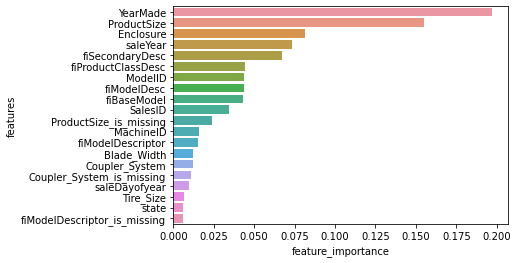

In [78]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [79]:
sum(ideal_model.feature_importances_)

1.0000000000000002

In [80]:
df.ProductSize.isna().sum()

216605

In [81]:
df.ProductSize.value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [82]:
df.Turbocharged.value_counts()

None or Unspecified    77111
Yes                     3985
Name: Turbocharged, dtype: int64

In [83]:
df.Thumb.value_counts()

None or Unspecified    85074
Manual                  9678
Hydraulic               7580
Name: Thumb, dtype: int64

## Extensions and Extra-curriculum

* Extra-curriculum: read pandas io tools for info on parquet/feather data formats - [IO tools documentation page](https://pandas.pydata.org/docs/user_guide/io.html#). 

* See all of the pandas dtypes in the pandas user guide: https://pandas.pydata.org/docs/user_guide/basics.html#dtypes 
* > **Note:** There are some ML models such as [`sklearn.ensemble.HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html), [CatBoost](https://catboost.ai/) and [XGBoost](https://xgboost.ai/) which can handle missing values, however, I'll leave exploring each of these as extra-curriculum/extensions.